In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Prodigy InfoTech\Task-05\cleaned.csv')
df.drop(columns = ["Vehicle_driver_relation", "Lanes_or_Medians", "Types_of_Junction", "Educational_level", "Vehicle_movement", "Pedestrian_movement", "Type_of_collision", "Cause_of_accident"], inplace = True)
df

,Age_band_of_driver,Sex_of_driver,Driving_experience,Road_surface_type,Light_conditions,Weather_conditions,Accident_severity
0,18-30,Male,1-2yr,Asphalt roads,Daylight,Normal,2
1,31-50,Male,Above 10yr,Asphalt roads,Daylight,Normal,2
2,18-30,Male,1-2yr,Asphalt roads,Daylight,Normal,1
3,18-30,Male,5-10yr,Earth roads,Darkness - lights lit,Normal,2
4,18-30,Male,2-5yr,Asphalt roads,Darkness - lights lit,Normal,2
...,...,...,...,...,...,...,...
12311,31-50,Male,2-5yr,Asphalt roads,Daylight,Normal,2
12312,Unknown,Male,5-10yr,Asphalt roads,Daylight,Normal,2
12313,Over 51,Male,5-10yr,Asphalt roads,Daylight,Normal,1
12314,18-30,Female,Above 10yr,Asphalt roads,Darkness - lights lit,Normal,2


In [90]:
df = df[~df.apply(lambda row: row.astype(str).str.contains("unknown", case=False))]
df = df.dropna()
df

,Age_band_of_driver,Sex_of_driver,Driving_experience,Road_surface_type,Light_conditions,Weather_conditions,Accident_severity
0,18-30,Male,1-2yr,Asphalt roads,Daylight,Normal,2
1,31-50,Male,Above 10yr,Asphalt roads,Daylight,Normal,2
2,18-30,Male,1-2yr,Asphalt roads,Daylight,Normal,1
3,18-30,Male,5-10yr,Earth roads,Darkness - lights lit,Normal,2
4,18-30,Male,2-5yr,Asphalt roads,Darkness - lights lit,Normal,2
...,...,...,...,...,...,...,...
12309,31-50,Female,5-10yr,Asphalt roads,Darkness - lights lit,Normal,2
12311,31-50,Male,2-5yr,Asphalt roads,Daylight,Normal,2
12313,Over 51,Male,5-10yr,Asphalt roads,Daylight,Normal,1
12314,18-30,Female,Above 10yr,Asphalt roads,Darkness - lights lit,Normal,2


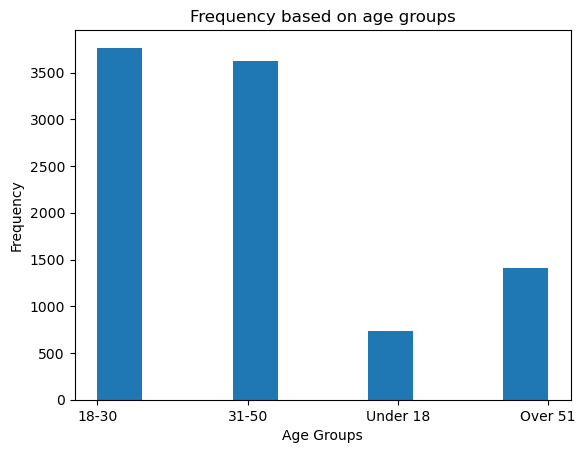

In [198]:
plt.hist(df.Age_band_of_driver)
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.title("Frequency based on age groups")
plt.show()

# Conclusion
### Most accidents occur with drivers aged 18-50.

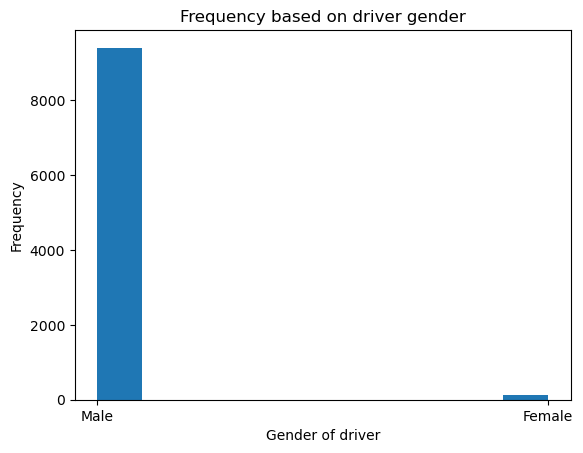

In [200]:
plt.hist(df.Sex_of_driver)
plt.xlabel("Gender of driver")
plt.ylabel("Frequency")
plt.title("Frequency based on driver gender")
plt.show()

# Conclusion
### Most accidents occur with male drivers.

In [237]:
df1 = df.groupby(["Accident_severity", "Weather_conditions"]).count().reset_index()
df1 = df1.drop(columns = df1.columns[3:])
df1.sort_values(by = ["Accident_severity", "Age_band_of_driver"], ascending = False)

,Accident_severity,Weather_conditions,Age_band_of_driver
11,2,Normal,6629
13,2,Raining,929
12,2,Other,209
9,2,Cloudy,91
16,2,Windy,63
15,2,Snow,47
14,2,Raining and Windy,30
10,2,Fog or mist,8
3,1,Normal,1203
5,1,Raining,134


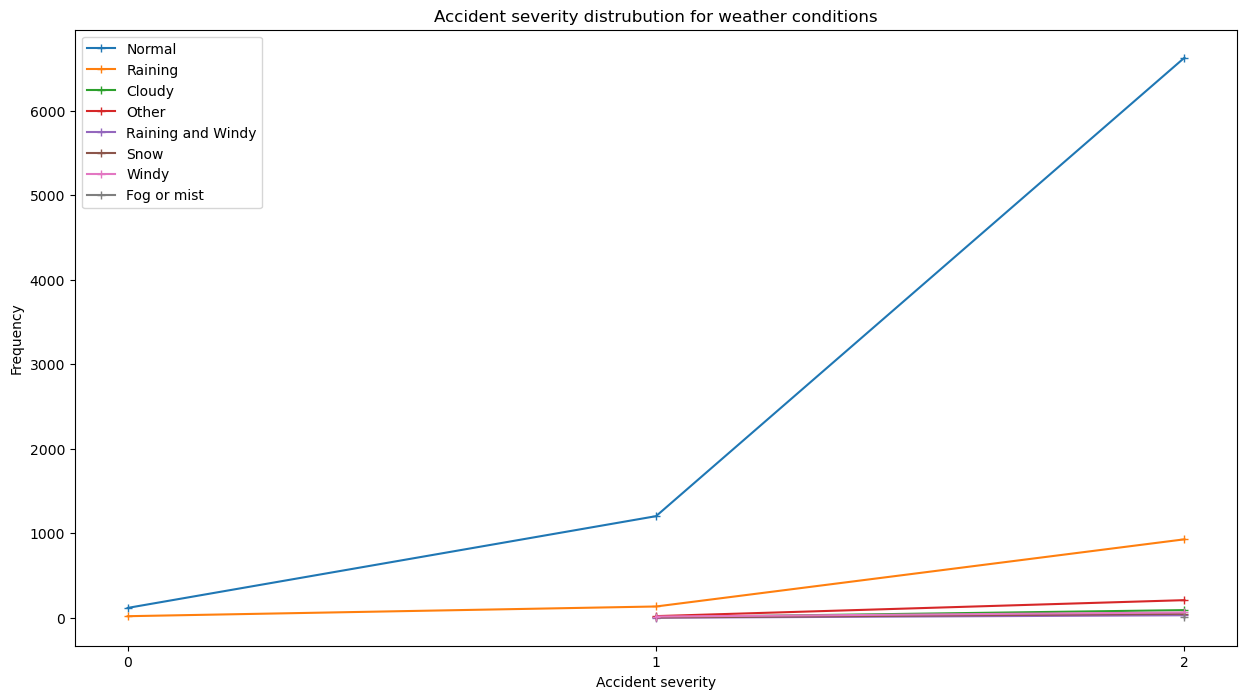

In [239]:
weather_list = list(df1.Weather_conditions.unique())
plt.figure(figsize = (15, 8))
for weathers in weather_list:
    weather = df1[df1["Weather_conditions"] == weathers]
    x = weather.Accident_severity
    y = weather.Age_band_of_driver
    plt.plot(x, y, marker = "+", label = weathers)

plt.legend()
plt.xticks([0, 1, 2])
plt.xlabel("Accident severity")
plt.ylabel("Frequency")
plt.title("Accident severity distrubution for weather conditions")
plt.show()

# Conclusion
### The most severe accidents occur in normal weather conditions.

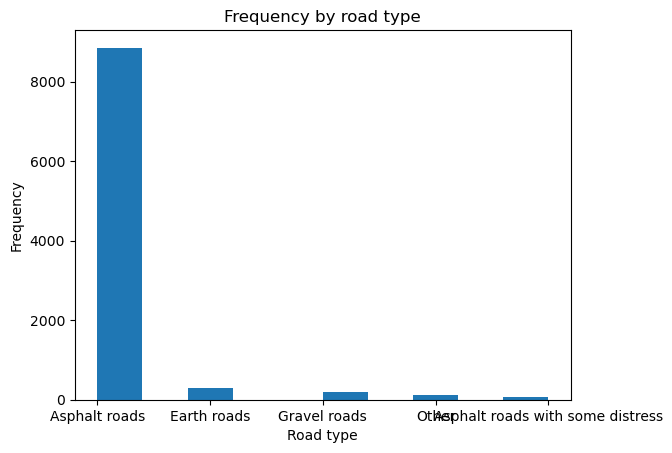

In [204]:
plt.hist(df.Road_surface_type)
plt.xlabel("Road type")
plt.ylabel("Frequency")
plt.title("Frequency by road type")
plt.show()

# Conclusion
### The road type recorded with the most accidents is Asphalt roads

In [233]:
df2 = df.groupby(["Accident_severity", "Light_conditions"]).count().reset_index()
df2 = df1.drop(columns = df1.columns[3:])
df2.sort_values(by = ["Accident_severity", "Age_band_of_driver"], ascending = False)

,Accident_severity,Light_conditions,Age_band_of_driver
10,2,Daylight,5794
7,2,Darkness - lights lit,2087
9,2,Darkness - no lighting,96
8,2,Darkness - lights unlit,29
6,1,Daylight,982
3,1,Darkness - lights lit,353
5,1,Darkness - no lighting,44
4,1,Darkness - lights unlit,5
2,0,Daylight,76
0,0,Darkness - lights lit,55


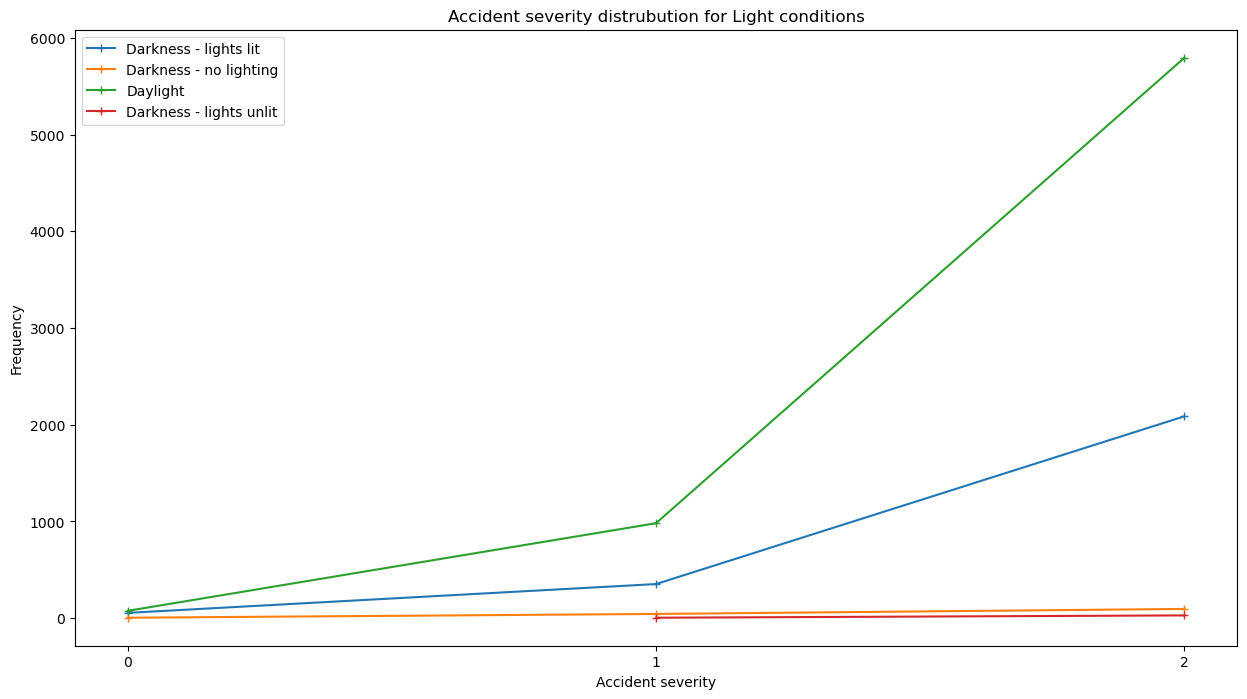

In [243]:
light_list = list(df2.Light_conditions.unique())
plt.figure(figsize = (15, 8))
for lights in light_list:
    light = df2[df2["Light_conditions"] == lights]
    x = light.Accident_severity
    y = light.Age_band_of_driver
    plt.plot(x, y, marker = "+", label = lights)

plt.legend()
plt.xticks([0, 1, 2])
plt.xlabel("Accident severity")
plt.ylabel("Frequency")
plt.title("Accident severity distrubution for Light conditions")
plt.show()

# Conclusion
### The most severe accidents occur in daylight, followed by incidents in darkness with streetlights, while other lighting conditions do not show a noticeable increase in the frequency of severe accidents.